# Preprocessing

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
df = pd.read_csv("Uber-Jan-Feb-FOIL.csv")

In [47]:
df.head(8)

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537
5,B02598,1/1/2015,870,6903
6,B02598,1/2/2015,785,4768
7,B02617,1/2/2015,1137,7065


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


In [49]:
df.isnull().sum()

dispatching_base_number    0
date                       0
active_vehicles            0
trips                      0
dtype: int64

# Feature Engineering

In [50]:
df['date'] = pd.to_datetime(df['date'])

In [51]:
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month

In [52]:
daily_trips = df.groupby('date')['trips'].sum().reset_index()

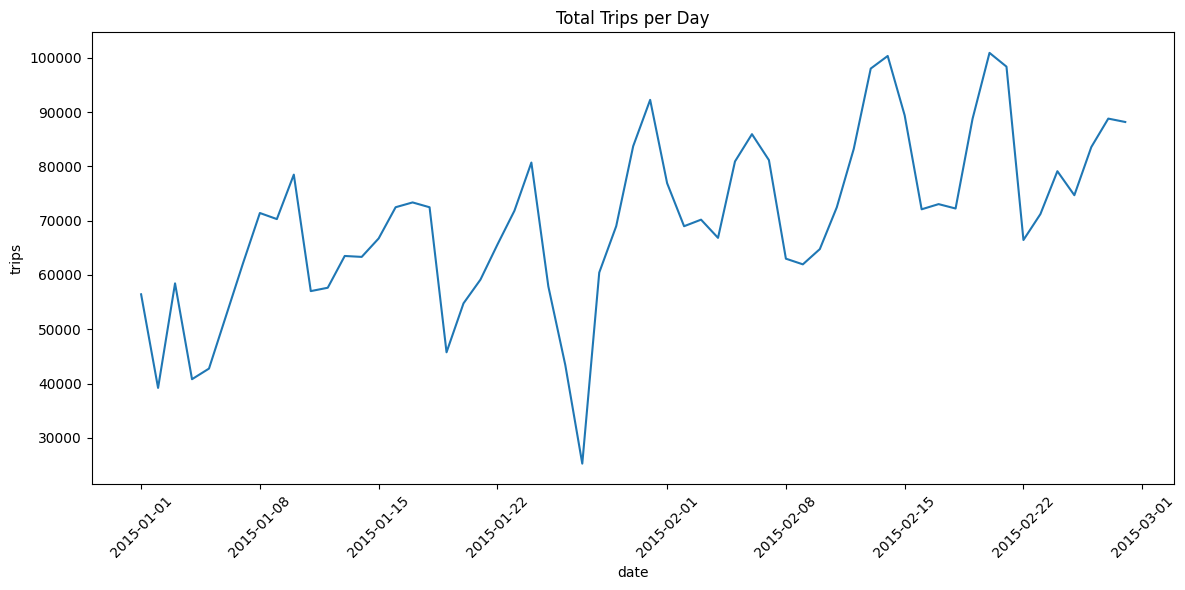

In [53]:
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_trips, x='date', y='trips')
plt.title("Total Trips per Day")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [54]:
weekday_trips = df.groupby('weekday')['trips'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

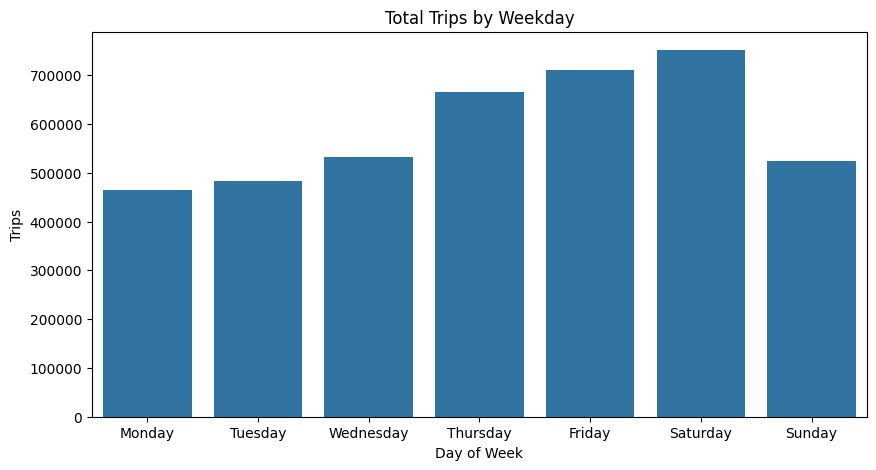

In [55]:
plt.figure(figsize=(10,5))
sns.barplot(x=weekday_trips.index, y=weekday_trips.values)
plt.title("Total Trips by Weekday")
plt.ylabel("Trips")
plt.xlabel("Day of Week")
plt.show()

In [56]:
df['dayofweek'] = df['date'].dt.weekday
df['dayofmonth'] = df['date'].dt.day
df['month'] = df['date'].dt.month

In [57]:
features = df.groupby('date').agg({
    'active_vehicles': 'sum',
    'trips': 'sum'
}).reset_index()

In [58]:
features['dayofweek'] = features['date'].dt.weekday
features['dayofmonth'] = features['date'].dt.day
features['month'] = features['date'].dt.month

In [59]:
X = features[['active_vehicles', 'dayofweek', 'dayofmonth', 'month']]
y = features['trips']

# Model Building

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred = model.predict(X_test)

In [63]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

print("R2 Score:", r2_score(y_test, y_pred))
# Calculate RMSE manually by taking the square root of MSE
# This works with older versions of scikit-learn that don't have the 'squared' parameter
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.8941156163354282
RMSE: 5226.258153372774


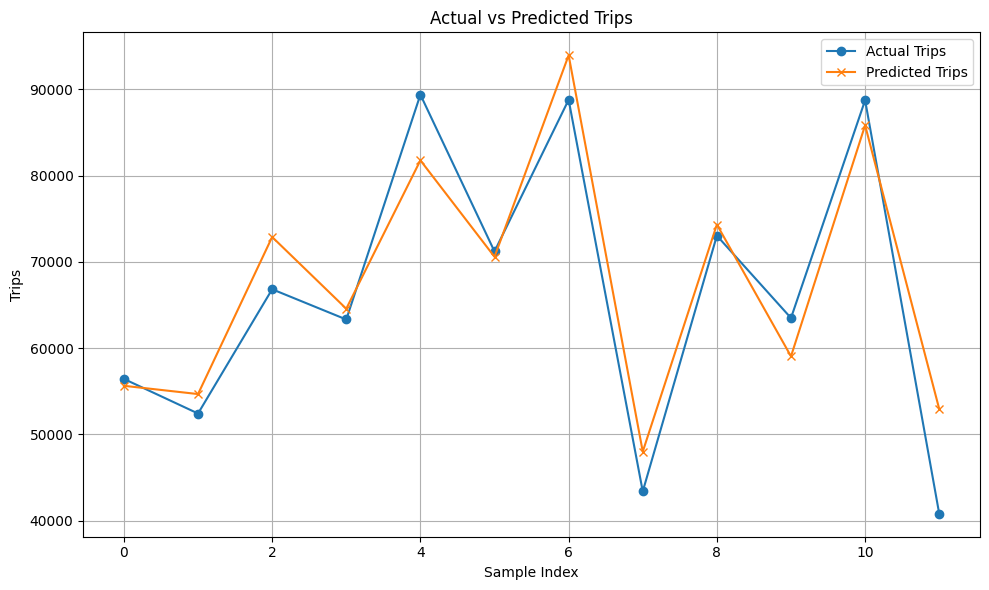

In [64]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Trips', marker='o')
plt.plot(y_pred, label='Predicted Trips', marker='x')
plt.title("Actual vs Predicted Trips")
plt.xlabel("Sample Index")
plt.ylabel("Trips")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()